## **IMPORTS**

In [32]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from tqdm import tqdm
from scipy.stats import skew, kurtosis
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.stattools import acf

## **STOCKS**

The selected stocks are categorized into different sectors to ensure diversification and effective risk management. The dataset includes equities from ten major sectors, each representing a distinct segment of the economy:

- **Technology (AAPL, MSFT, NVDA, GOOGL):** High-growth companies driven by innovation, often exhibiting higher volatility.

- **Healthcare (JNJ, PFE, UNH, MRNA):** Defensive stocks benefiting from stable demand but influenced by regulatory changes.

- **Financials (JPM, BAC, GS, V):** Interest rate-sensitive stocks, highly correlated with economic cycles.

- **Consumer Discretionary (AMZN, TSLA, NKE, MCD):** Companies dependent on consumer spending, making them cyclical in nature.

- **Consumer Staples (PG, KO, WMT, UL):** Defensive stocks offering stability during economic downturns.

- **Energy (XOM, CVX, BP, NEE):** Strongly impacted by oil prices and global energy trends.

- **Industrials (GE, CAT, BA, HON):** Cyclical stocks tied to economic growth and infrastructure spending.

- **Utilities (DUK, SO):** Defensive, lower-volatility stocks with stable cash flows, benefiting from regulatory frameworks.

- **Real Estate (AMT, SPG, O):** Income-generating assets sensitive to interest rate movements.

- **Materials (FCX, DOW, LIN):** Companies dealing with raw materials, affected by commodity price fluctuations.

In [33]:
stocks = {
    "Technology": ["AAPL", "MSFT", "NVDA", "GOOGL"],
    "Healthcare": ["JNJ", "PFE", "UNH", "MRNA"],
    "Financials": ["JPM", "BAC", "GS", "V"],
    "Consumer Discretionary": ["AMZN", "TSLA", "NKE", "MCD"],
    "Consumer Staples": ["PG", "KO", "WMT", "UL"],
    "Energy": ["XOM", "CVX", "BP", "NEE"],
    "Industrials": ["GE", "CAT", "BA", "HON"],
    "Utilities": ["DUK", "SO"],
    "Real Estate": ["AMT", "SPG", "O"],
    "Materials": ["FCX", "DOW", "LIN"]
}


------------------------------------------------STOCK DISTRIBUTIONS------------------------------------------------


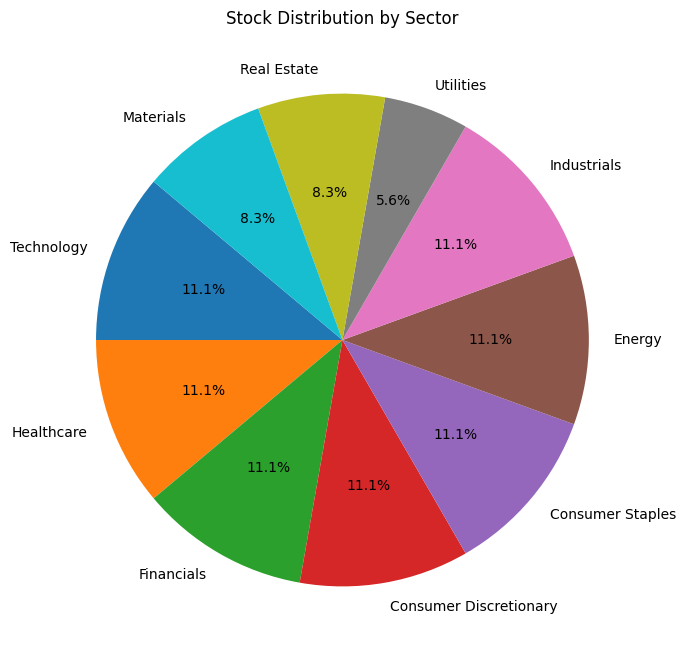

In [34]:
labels = list(stocks.keys())
sizes = [len(stocks[sector]) for sector in stocks]

# pie chart
print("\n------------------------------------------------STOCK DISTRIBUTIONS------------------------------------------------")
plt.figure(figsize=(8, 8))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.title("Stock Distribution by Sector")
plt.show()

## **FETCH DATA**

Here are the columns, in other words features, that Yahoo Finance provide by download() method.

And a simple table which Apple is chosen as the Ticker, to give us an idea of ​​how to use the columns.

In [35]:
df = yf.download("AAPL", period="2d")

columns_df = pd.DataFrame(df.columns.get_level_values(0))

display(columns_df.T)

display(df)

[*********************100%***********************]  1 of 1 completed


,0,1,2,3,4
Price,Close,High,Low,Open,Volume


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-02-19,244.869995,246.009995,243.160004,244.660004,32204200
2025-02-20,245.830002,246.779999,244.289993,244.940002,32278300


You can see a part of the giant table below which includes all the stocks and their some market feature values. It looks pretty complicated for the first look. Just a bunch of numbers...

We can divide this dataframe by stocks or features. But can we really interpret these tables? 

This is where graphs, histograms, and more come into play.

In [36]:
all_tickers = []
sector_mapping = {}
for sector, tickers in stocks.items():
    all_tickers.extend(tickers)
    for ticker in tickers:
        sector_mapping[ticker] = sector

end_date = datetime.now()
start_date = end_date - timedelta(days=2*365) # 2 years

def fetch_stock_data(tickers, start_date, end_date):
    df_list = []
    for ticker in tqdm(tickers, desc="Fetching stock data"):
        stock = yf.download(ticker, start=start_date, end=end_date, progress=False)
        df_list.append(stock)
    return pd.concat(df_list, axis=1)

# Fetch the data
data = fetch_stock_data(all_tickers, start_date, end_date)
print("\n------------------------------------------------PRICES------------------------------------------------")
display(data.head())



Fetching stock data: 100%|██████████| 36/36 [00:10<00:00,  3.54it/s]


------------------------------------------------PRICES------------------------------------------------


Price,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,MSFT,MSFT,MSFT,MSFT,MSFT,...,DOW,DOW,DOW,DOW,DOW,LIN,LIN,LIN,LIN,LIN
Date,,,,,,,,,,,,,,,,,,,,,
2023-02-22,147.423264,148.452873,145.690736,147.383654,51011300,247.572449,250.358145,246.420768,250.112059,22491100,...,51.263123,51.645283,50.984374,51.056308,3735400,321.604614,323.397637,316.751739,319.489999,3595100
2023-02-23,147.908356,148.838973,145.769933,148.591469,48394200,250.781387,252.818972,246.558542,251.559013,29219100,...,51.424980,51.901556,50.651675,51.622804,4154000,323.417175,325.804611,318.077064,323.261256,3836400
2023-02-24,145.245255,145.720458,144.265133,145.641255,55469600,245.318314,247.070445,244.215853,246.046734,24990900,...,51.964500,52.040931,50.408893,50.678651,4831800,338.784515,339.320462,314.374004,314.841761,14737800
2023-02-27,146.443176,147.680696,145.977868,146.235281,44998500,246.243622,248.861982,245.485672,248.507617,21190000,...,51.873474,52.465115,51.700530,52.228460,5443100,335.685822,339.427787,335.412971,337.410625,3708600
2023-02-28,145.938248,147.591572,145.364037,145.581841,50547000,245.515167,247.552767,244.835967,245.170656,22491000,...,52.064621,52.346787,51.764246,51.991802,5835300,339.476471,342.185499,335.412943,335.676040,3274400


## **Missing Data Check**

In [37]:
# Missing Data Check
missing_data = data.isnull().sum()
total_missing = missing_data.sum()

missing_data_df = pd.DataFrame(missing_data, columns=['Missing Count']).T

print("------------------------------------------------MISSING DATA COUNT------------------------------------------------")
display(missing_data_df)  # Transposed version
print(f"\nTotal Missing Values: {total_missing}")

------------------------------------------------MISSING DATA COUNT------------------------------------------------


Price,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL,MSFT,MSFT,MSFT,MSFT,MSFT,...,DOW,DOW,DOW,DOW,DOW,LIN,LIN,LIN,LIN,LIN
Missing Count,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0



Total Missing Values: 0


### **Forward-fill the gaps**

- **What does do forward-filling for a time series data?**

    If a value isn't available for day N, forward-fill fills it with the value for another day, such as N-1 or N-2, so that it contains the latest 
available value.

- **Why didn't we just drop NaN values?**

    To prevent data from jumping between indexes (date in this case).

Since the data has no empty values as shown above, I chose not to use this or any other method for filling. But this constraint is valid for the given timeline and the given stocks (tickers). 

Filling the missing values ​​will be important when planning to invest in different markets.

    Holidays in different countries are on different days, stock market closed over the weekend but bitcoin trades are continuously,...

It doesn't hurt to be prepared in advance.



In [38]:
data = data.ffill()

In [39]:
close = data['Close']
display(close.head())

Ticker,AAPL,MSFT,NVDA,GOOGL,JNJ,PFE,UNH,MRNA,JPM,BAC,...,BA,HON,DUK,SO,AMT,SPG,O,FCX,DOW,LIN
Date,,,,,,,,,,,,,,,,,,,,,
2023-02-22,147.423264,247.572449,20.738918,91.318962,148.314285,37.928890,474.214142,158.169998,131.701782,32.429333,...,205.759995,187.267700,89.781319,60.566532,186.398575,108.217079,58.678192,40.644287,51.263123,321.604614
2023-02-23,147.908356,250.781387,23.646799,90.561707,148.267273,37.857292,476.930115,147.570007,132.756821,32.400959,...,208.130005,187.806976,89.201004,60.102352,188.905334,109.289421,59.179714,39.477177,51.424980,323.417175
2023-02-24,145.245255,245.318314,23.269073,88.808060,146.612869,37.365059,469.790985,139.259995,133.954468,32.353672,...,198.149994,184.937180,89.274704,59.935246,183.078018,108.869423,58.194580,38.796371,51.964500,338.784515
2023-02-27,146.443176,246.243622,23.483917,89.545395,146.293259,36.496937,468.811310,138.270004,135.123596,32.353672,...,200.460007,185.332016,88.252251,59.758862,182.470078,109.477081,57.997555,39.010342,51.873474,335.685822
2023-02-28,145.938248,245.515167,23.199125,89.734703,144.065460,36.308990,461.652924,138.809998,136.254700,32.438789,...,201.550003,184.397919,86.824524,58.542709,185.210632,109.101768,57.498535,39.846771,52.064621,339.476471


# **KEY STATISTICS, VISUALIZATIONS, DISTRIBUTIONS**

### **Basic Statistics**

- **Summary Statistics (df.describe()):** Mean, std dev, min, max, quartiles.

- **Missing Data Check:** Identify gaps in historical prices.

- **Daily Returns (df.pct_change()):** Calculate percentage change in stock prices.

In [40]:
# Summary Statistics
summary_stats = close.describe()
print("------------------------------------------------SUMMARY STATISTICS------------------------------------------------")
display(summary_stats)

------------------------------------------------SUMMARY STATISTICS------------------------------------------------


Ticker,AAPL,MSFT,NVDA,GOOGL,JNJ,PFE,UNH,MRNA,JPM,BAC,...,BA,HON,DUK,SO,AMT,SPG,O,FCX,DOW,LIN
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,...,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,195.190856,376.010094,80.000470,147.515244,151.264285,29.072160,511.996970,97.762126,179.213728,34.667240,...,192.562136,198.599780,95.950481,72.713987,190.491071,134.610897,53.755435,41.317720,49.482069,411.158164
std,27.183982,54.935473,41.242902,27.381446,6.186282,3.716721,41.511393,34.191635,41.424196,6.785557,...,25.849709,13.885642,10.887095,9.207600,17.969956,28.005905,3.933596,5.104293,4.376279,42.375918
min,143.859207,242.414490,20.738918,88.808060,138.898865,23.770126,434.134247,30.535000,118.727409,24.351030,...,138.139999,171.370544,80.404999,57.855709,149.803253,91.831680,42.851200,32.417767,37.380001,321.604614
25%,173.651062,327.537964,43.882080,129.092026,145.700684,26.177237,480.437195,75.980003,141.141449,27.968460,...,174.800003,188.404434,86.787689,65.608231,179.728394,106.734947,50.949589,37.553963,47.591820,371.637390
50%,188.239822,400.359741,73.879066,143.161026,151.331726,27.820791,503.851318,102.809998,176.857040,33.244026,...,190.119995,196.749573,91.623543,68.152458,188.451111,137.528992,54.029999,39.992653,50.213646,414.950012
75%,222.420486,418.703339,122.651054,169.111526,155.425842,32.440960,536.834839,122.820000,207.885849,39.511185,...,209.199997,205.325394,106.900574,81.686920,199.977982,156.093781,56.130802,44.527760,52.201397,447.213623
max,258.735504,464.854340,149.429993,206.380005,165.249863,37.928890,622.861023,166.610001,279.950012,47.740002,...,264.269989,236.000000,118.522835,92.593460,238.953278,186.710007,63.503174,54.324524,57.570972,484.979095


**Save the Data**

After ensuring that there is no NaN values, processed above, saved it for future use.

In [41]:
# Save the data for future use
data.to_csv('stock.csv')

close.to_csv('close_prices.csv')

### **Time-Series Plots**

- **Stock Price Trends:** Line plots that display the historical movement of stock prices, allowing visualization of upward or downward trends over time.

- **Log Returns:** The natural logarithm of price changes, which makes returns more normally distributed and easier to analyze in financial modeling.

- **Rolling Statistics:** Uses a moving window to smooth fluctuations in stock prices.

    **Rolling statistics** allow data to be updated by scrolling through a specified window size. This is a common technique for examining trends and volatility in time series analysis.

    - **Moving Average** calculates the average of data within a specified window size and updates it by shifting it over time.

    - **Rolling volatility** calculates the standard deviation within the specified window size.

    - **Rolling correlation** calculates the correlation between two time series within a specified time window.

In [42]:
tickers = [ticker for sector_tickers in stocks.values() for ticker in sector_tickers]

print(tickers)

['AAPL', 'MSFT', 'NVDA', 'GOOGL', 'JNJ', 'PFE', 'UNH', 'MRNA', 'JPM', 'BAC', 'GS', 'V', 'AMZN', 'TSLA', 'NKE', 'MCD', 'PG', 'KO', 'WMT', 'UL', 'XOM', 'CVX', 'BP', 'NEE', 'GE', 'CAT', 'BA', 'HON', 'DUK', 'SO', 'AMT', 'SPG', 'O', 'FCX', 'DOW', 'LIN']


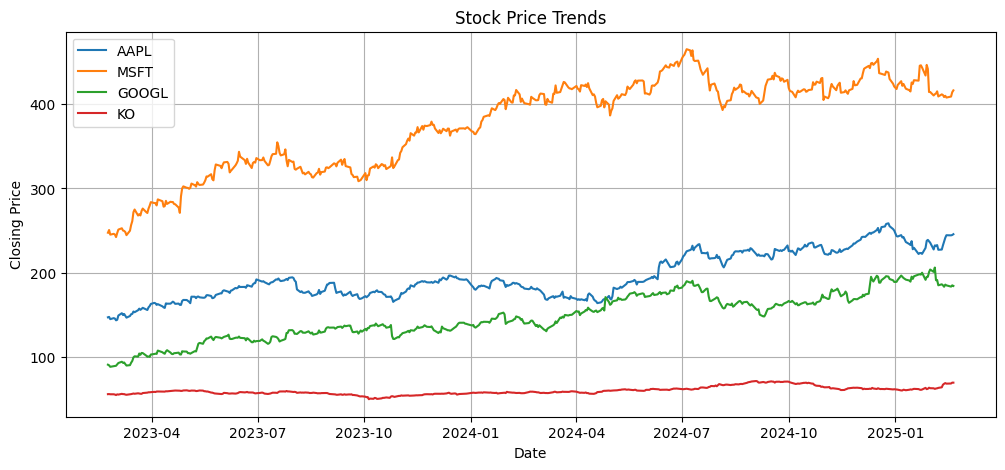

In [43]:
# Stock Price Trends

selected_stocks = ["AAPL", "MSFT", "GOOGL", "KO"]

plt.figure(figsize=(12, 5))
for stock in selected_stocks:
    plt.plot(close.index, close[stock], label=stock)
plt.legend()
plt.title("Stock Price Trends")
plt.xlabel("Date")
plt.ylabel("Closing Price")
plt.grid(True)
plt.show()

## **Calculating Returns**

Since the subject chosen for this project is portfolio optimization, the statistical value decided to use is return price which is derived from 'Close' prices.

Hence, the decision on whether an asset will be included in the portfolio will be made based on the 'Close' price.

We can simply check **log returns** and **percentage returns** below. 

We see that there is not much fluctuation between the numbers corresponding to the same square from two type of return tables, but they are not equal either.

***Which one to choose?***

- Log returns are symmetric: a +10% return followed by a -10% return gives you exactly the initial value
- Percentage returns are asymmetric: +10% followed by -10% results in a loss
- This makes log returns better for comparing upside and downside movements



It was preferred to show visual analysis on several stocks since showing all stocks makes the visual complicated and makes it impossible to comment on the chart.

In [44]:
# Daily Returns (Percentage)
pct_returns = close.pct_change().dropna()

# Daily Returns (Log)
log_returns = np.log(close/close.shift(1)).dropna()

print("\n------------------------------------------------DAILY PERCENTAGE RETURNS------------------------------------------------")
display(pct_returns.head())

print("\n------------------------------------------------DAILY LOG RETURNS------------------------------------------------")
display(log_returns.head())


------------------------------------------------DAILY PERCENTAGE RETURNS------------------------------------------------


Ticker,AAPL,MSFT,NVDA,GOOGL,JNJ,PFE,UNH,MRNA,JPM,BAC,...,BA,HON,DUK,SO,AMT,SPG,O,FCX,DOW,LIN
Date,,,,,,,,,,,,,,,,,,,,,
2023-02-23,0.003290,0.012962,0.140214,-0.008292,-0.000317,-0.001888,0.005727,-0.067016,0.008011,-0.000875,...,0.011518,0.002880,-0.006464,-0.007664,0.013448,0.009909,0.008547,-0.028715,0.003157,0.005636
2023-02-24,-0.018005,-0.021784,-0.015974,-0.019364,-0.011158,-0.013002,-0.014969,-0.056312,0.009021,-0.001459,...,-0.047951,-0.015281,0.000826,-0.002780,-0.030848,-0.003843,-0.016646,-0.017246,0.010491,0.047516
2023-02-27,0.008248,0.003772,0.009233,0.008303,-0.002180,-0.023234,-0.002085,-0.007109,0.008728,0.000000,...,0.011658,0.002135,-0.011453,-0.002943,-0.003321,0.005582,-0.003386,0.005515,-0.001752,-0.009147
2023-02-28,-0.003448,-0.002958,-0.012127,0.002114,-0.015228,-0.005150,-0.015269,0.003905,0.008371,0.002631,...,0.005437,-0.005040,-0.016178,-0.020351,0.015019,-0.003428,-0.008604,0.021441,0.003685,0.011292
2023-03-01,-0.014246,-0.012629,-0.022312,0.003331,-0.004502,-0.009613,-0.001513,-0.022693,-0.005581,-0.004665,...,0.014885,0.007312,-0.024931,-0.011735,-0.015757,-0.006880,-0.006724,0.049548,0.014336,0.004822



------------------------------------------------DAILY LOG RETURNS------------------------------------------------


Ticker,AAPL,MSFT,NVDA,GOOGL,JNJ,PFE,UNH,MRNA,JPM,BAC,...,BA,HON,DUK,SO,AMT,SPG,O,FCX,DOW,LIN
Date,,,,,,,,,,,,,,,,,,,,,
2023-02-23,0.003285,0.012878,0.131216,-0.008327,-0.000317,-0.001889,0.005711,-0.069368,0.007979,-0.000875,...,0.011452,0.002876,-0.006485,-0.007693,0.013359,0.009860,0.008511,-0.029136,0.003152,0.005620
2023-02-24,-0.018169,-0.022025,-0.016103,-0.019554,-0.011221,-0.013088,-0.015082,-0.057960,0.008981,-0.001460,...,-0.049139,-0.015399,0.000826,-0.002784,-0.031334,-0.003850,-0.016787,-0.017396,0.010437,0.046421
2023-02-27,0.008214,0.003765,0.009191,0.008268,-0.002182,-0.023508,-0.002088,-0.007134,0.008690,0.000000,...,0.011590,0.002133,-0.011519,-0.002947,-0.003326,0.005566,-0.003391,0.005500,-0.001753,-0.009189
2023-02-28,-0.003454,-0.002963,-0.012201,0.002112,-0.015345,-0.005163,-0.015387,0.003898,0.008336,0.002627,...,0.005423,-0.005053,-0.016310,-0.020561,0.014908,-0.003434,-0.008641,0.021215,0.003678,0.011229
2023-03-01,-0.014348,-0.012710,-0.022565,0.003326,-0.004512,-0.009659,-0.001514,-0.022954,-0.005597,-0.004676,...,0.014775,0.007285,-0.025247,-0.011804,-0.015882,-0.006904,-0.006746,0.048360,0.014234,0.004811


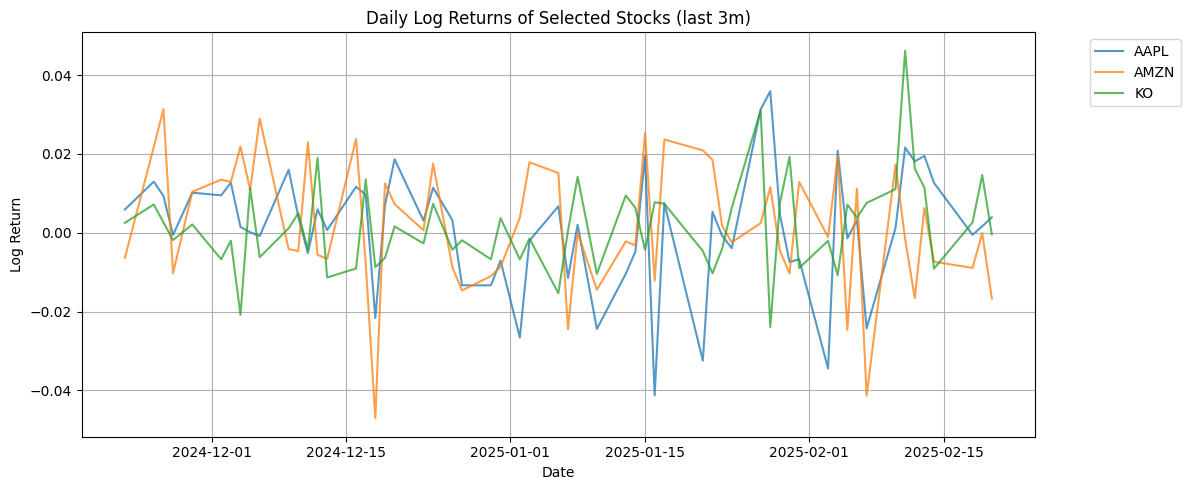

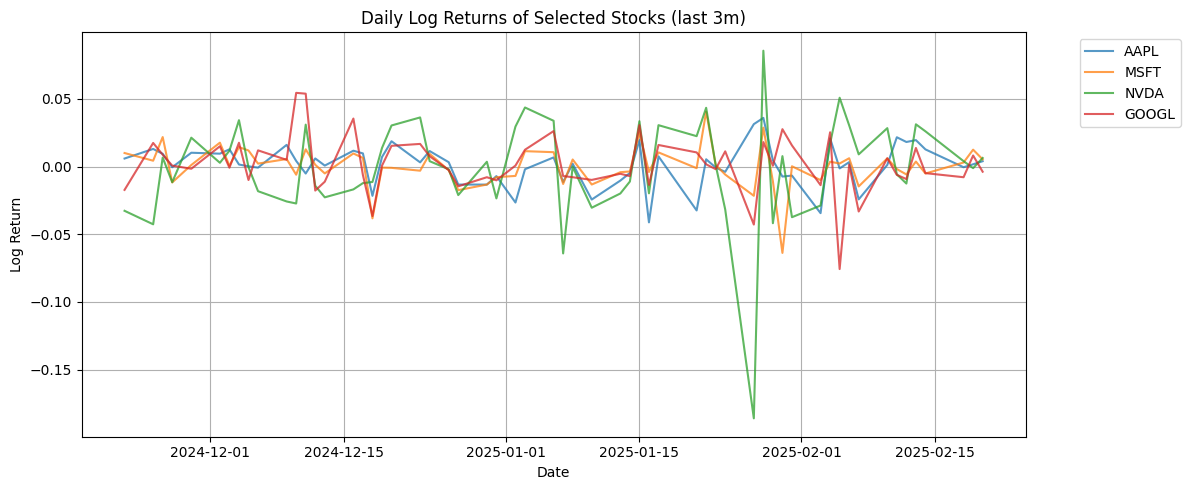

In [45]:
def get_period_data(data, period):
    
    end_date = data.index[-1]  # Last date in the data
    
    # Parse period string
    amount = int(period.split()[1][0])  # Get the number
    unit = period.split()[1][1]  # Get the unit (m/y)
    
    if unit == 'm':
        days = amount * 30  # Approximate month as 30 days
    elif unit == 'y':
        days = amount * 365  # Approximate year as 365 days
    else:
        raise ValueError("Unsupported period unit. Use 'm' for months or 'y' for years")
    
    start_date = end_date - timedelta(days=days)
    return data[data.index >= start_date]

def plot_returns(returns_data, selected_tickers, plot_type="percentage", 
                period=None, figsize=(12, 5)):
    
    # Filter data for period if specified
    plot_data = returns_data.copy()
    if period:
        plot_data = get_period_data(plot_data, period)
    
    plt.figure(figsize=figsize)
    
    for stock in selected_tickers:
        if stock in plot_data.columns:
            plt.plot(plot_data.index, plot_data[stock], label=stock, alpha=0.75)
        else:
            print(f"Warning: {stock} not found in data")
            
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    
    period_str = f" ({period})" if period else ""
    plt.title(f"Daily {plot_type.capitalize()} Returns of Selected Stocks{period_str}")
    plt.xlabel("Date")
    plt.ylabel(f"{'Percentage' if plot_type == 'percentage' else 'Log'} Return")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def compare_sector_returns(returns_data, stocks_dict, sector_name, plot_type="percentage",
                         period=None):
    
    if sector_name in stocks_dict:
        sector_tickers = stocks_dict[sector_name]
        plot_returns(returns_data, sector_tickers, plot_type, period)
    else:
        print(f"Sector {sector_name} not found in data")


selected_stocks = ['AAPL', 'AMZN', 'KO']
#Last month
#plot_returns(pct_returns, selected_stocks, "percentage", period="last 1m")

# Last 3 months
plot_returns(log_returns, selected_stocks, "log", period="last 3m")

# Last 6 months
# plot_returns(pct_returns, selected_stocks, "percentage", period="last 6m")

# Last year
# plot_returns(pct_returns, selected_stocks, "percentage", period="last 1y")

# Plot specific sector for a period
compare_sector_returns(log_returns, stocks, "Technology", "log", period="last 3m")

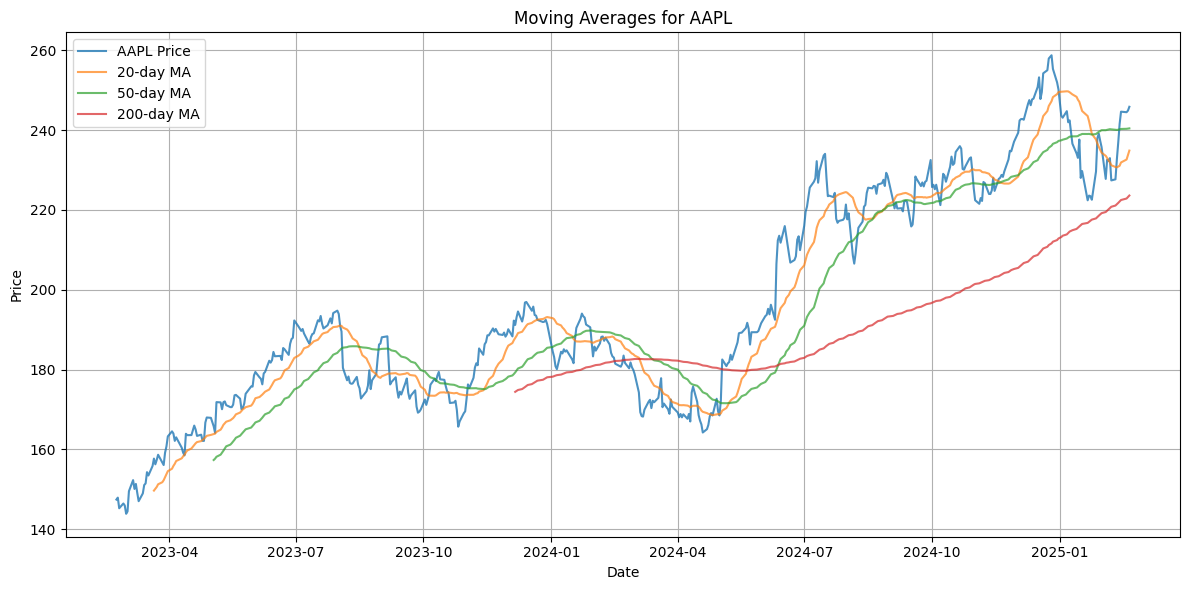

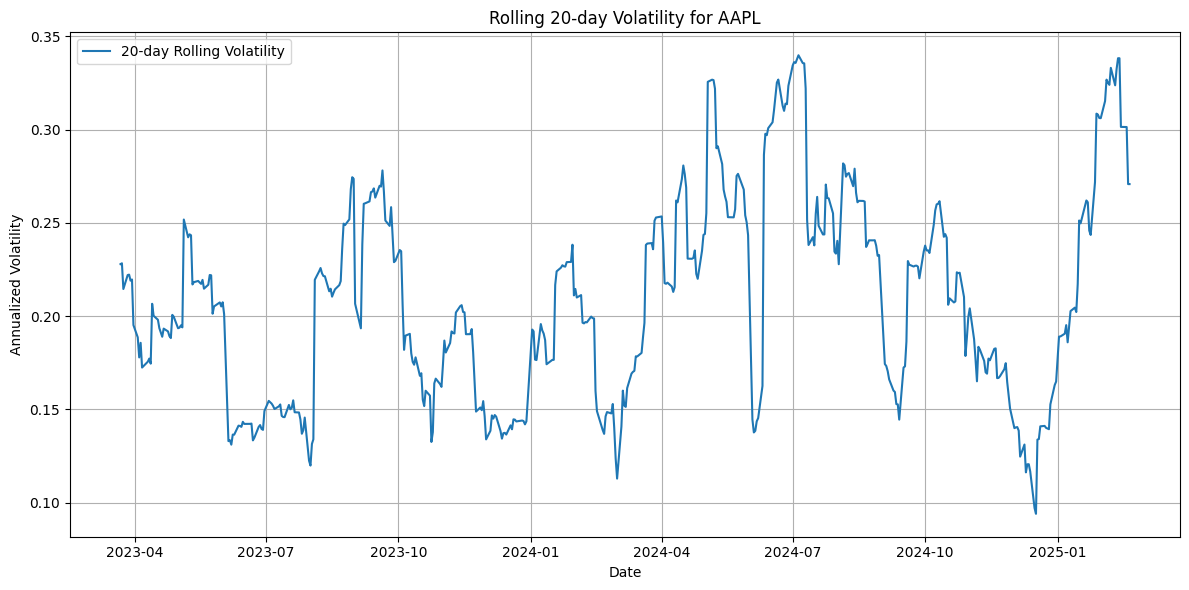


Volatility Summary Statistics for AAPL:
Average Volatility: 20.85%
Max Volatility: 33.98%
Min Volatility: 9.41%


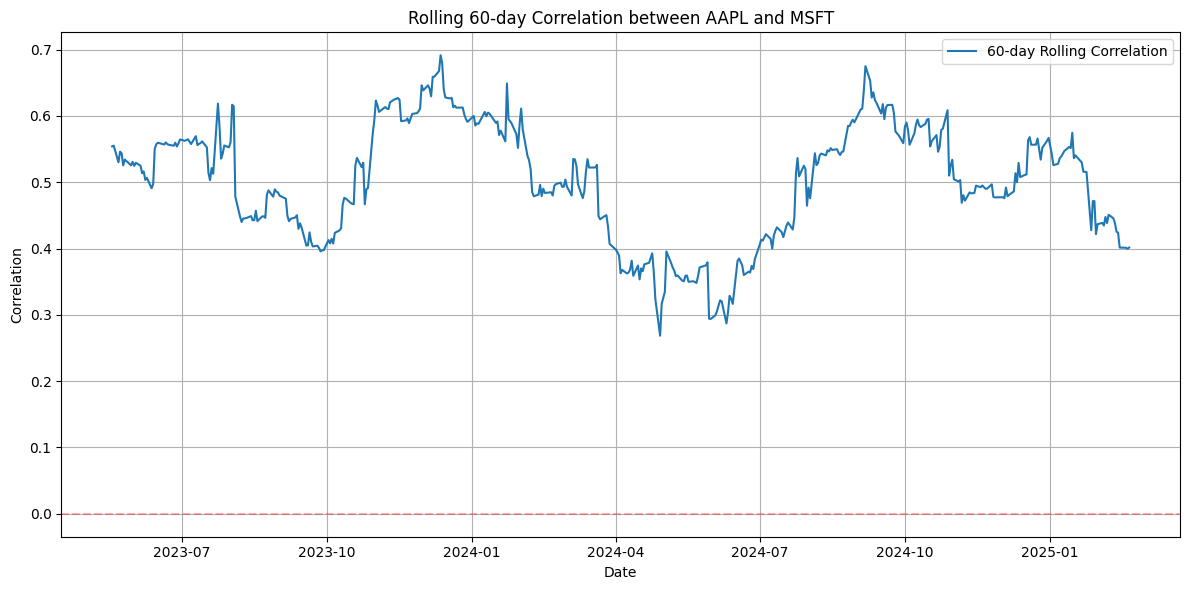


Correlation Summary Statistics:
Average Correlation: 0.50
Max Correlation: 0.69
Min Correlation: 0.27


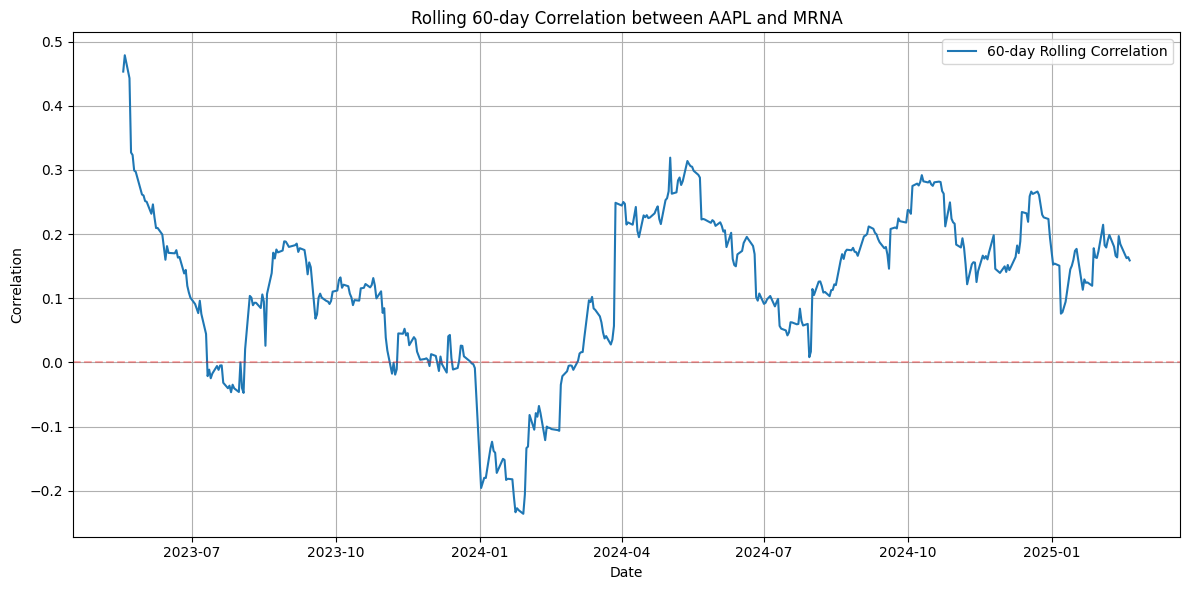


Correlation Summary Statistics:
Average Correlation: 0.12
Max Correlation: 0.48
Min Correlation: -0.24


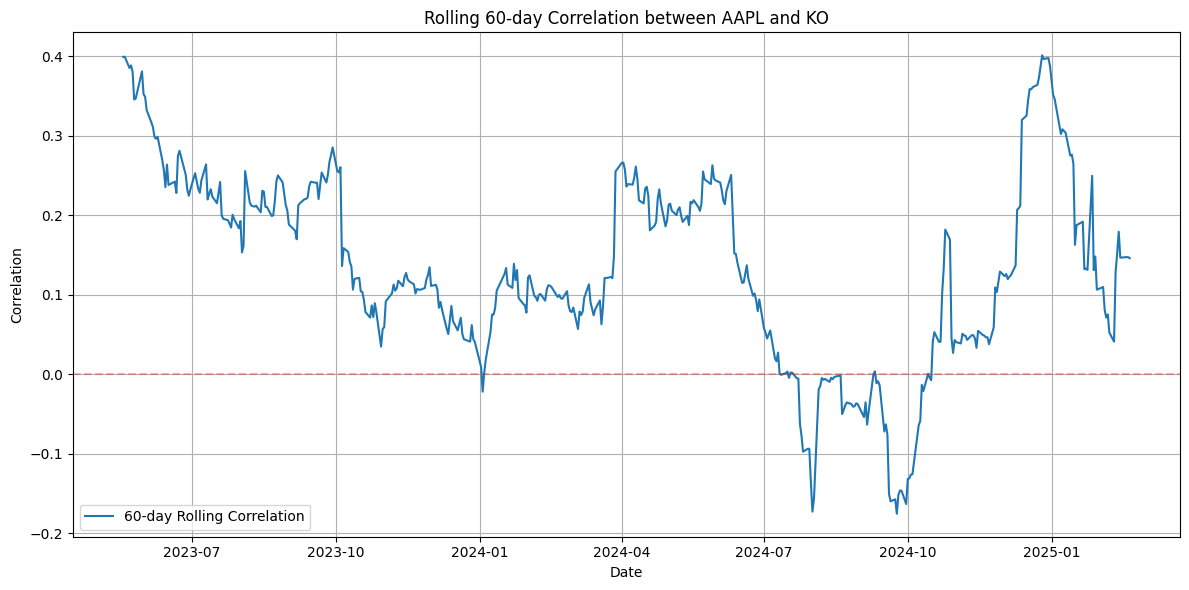


Correlation Summary Statistics:
Average Correlation: 0.13
Max Correlation: 0.40
Min Correlation: -0.18


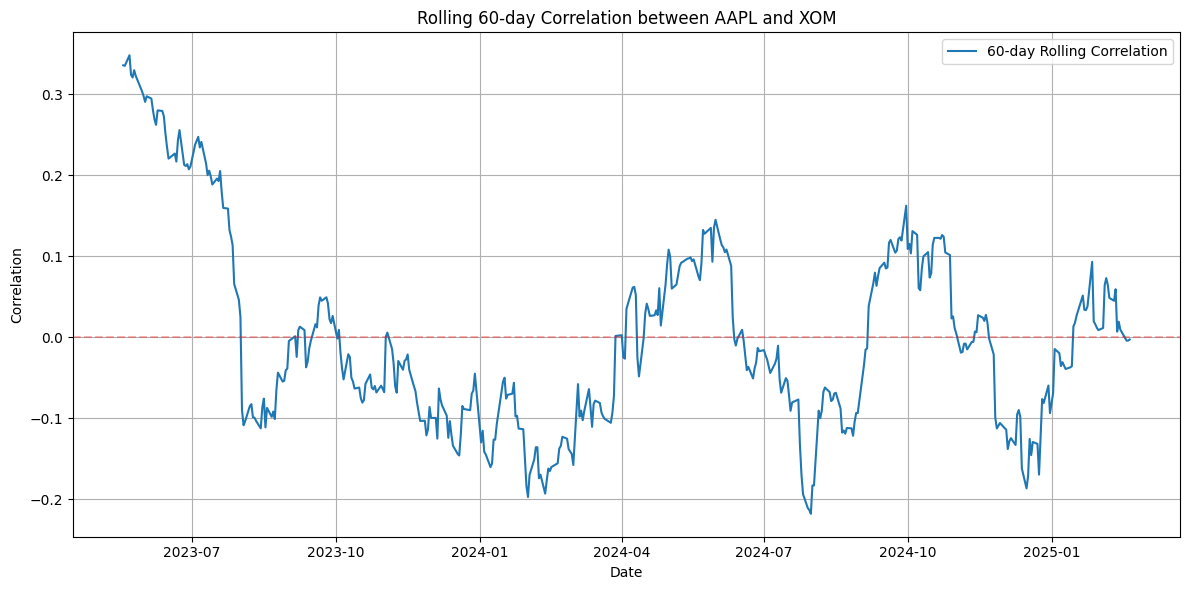


Correlation Summary Statistics:
Average Correlation: -0.00
Max Correlation: 0.35
Min Correlation: -0.22

Average 60-day Correlations with AAPL:
MSFT: 0.50
GOOGL: 0.41
NVDA: 0.34


In [46]:
def plot_moving_averages(price_data, ticker, windows=[20, 50, 200], figsize=(12, 6)):

    plt.figure(figsize=figsize)
    
    # original price
    plt.plot(price_data.index, price_data[ticker], label=f'{ticker} Price', alpha=0.8)
    
    # Mmoving averages
    for window in windows:
        ma = price_data[ticker].rolling(window=window).mean()
        plt.plot(price_data.index, ma, 
                label=f'{window}-day MA', 
                alpha=0.7)
    
    plt.title(f'Moving Averages for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

def plot_rolling_volatility(returns_data, ticker, window=20, figsize=(12, 6)):

    # Calculate rolling volatility (annualized)
    rolling_vol = returns_data[ticker].rolling(window=window).std() * np.sqrt(252)
    
    plt.figure(figsize=figsize)
    plt.plot(returns_data.index, rolling_vol, label=f'{window}-day Rolling Volatility')
    plt.title(f'Rolling {window}-day Volatility for {ticker}')
    plt.xlabel('Date')
    plt.ylabel('Annualized Volatility')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    print(f"\nVolatility Summary Statistics for {ticker}:")
    print(f"Average Volatility: {rolling_vol.mean():.2%}")
    print(f"Max Volatility: {rolling_vol.max():.2%}")
    print(f"Min Volatility: {rolling_vol.min():.2%}")

def plot_rolling_correlation(returns_data, ticker1, ticker2, window=60, figsize=(12, 6)):

    # Calculate rolling correlation
    rolling_corr = returns_data[ticker1].rolling(window=window)\
                    .corr(returns_data[ticker2])
    
    plt.figure(figsize=figsize)
    plt.plot(returns_data.index, rolling_corr, 
             label=f'{window}-day Rolling Correlation')
    plt.axhline(y=0, color='r', linestyle='--', alpha=0.3)
    plt.title(f'Rolling {window}-day Correlation between {ticker1} and {ticker2}')
    plt.xlabel('Date')
    plt.ylabel('Correlation')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()
    
    print(f"\nCorrelation Summary Statistics:")
    print(f"Average Correlation: {rolling_corr.mean():.2f}")
    print(f"Max Correlation: {rolling_corr.max():.2f}")
    print(f"Min Correlation: {rolling_corr.min():.2f}")

def analyze_multiple_correlations(returns_data, base_ticker, compare_tickers, window=60):

    # Calculate average correlations
    correlations = {}
    for ticker in compare_tickers:
        if ticker != base_ticker:
            corr = returns_data[base_ticker].rolling(window=window)\
                    .corr(returns_data[ticker]).mean()
            correlations[ticker] = corr
    
    # Sort correlations
    sorted_corrs = sorted(correlations.items(), key=lambda x: abs(x[1]), reverse=True)
    
    print(f"\nAverage {window}-day Correlations with {base_ticker}:")
    for ticker, corr in sorted_corrs:
        print(f"{ticker}: {corr:.2f}")

# Moving Averages
plot_moving_averages(close, 'AAPL', windows=[20, 50, 200])

# Rolling Volatility
plot_rolling_volatility(log_returns, 'AAPL', window=20)

# Rolling Correlation between two stocks
plot_rolling_correlation(log_returns, 'AAPL', 'MSFT', window=60)
plot_rolling_correlation(log_returns, 'AAPL', 'MRNA', window=60)
plot_rolling_correlation(log_returns, 'AAPL', 'KO', window=60)
plot_rolling_correlation(log_returns, 'AAPL', 'XOM', window=60)


# Analyze correlations with multiple stocks (tech)
tech_stocks = ['AAPL', 'MSFT', 'GOOGL', 'NVDA']
analyze_multiple_correlations(log_returns, 'AAPL', tech_stocks, window=60)

### **Return Distributions**
- **Histogram of Returns:** A bar chart that displays the frequency of different return values, helping identify skewness (asymmetry) and kurtosis (tail heaviness) in stock returns.

- **Kernel Density Estimation (KDE):** A smoothed version of the histogram that estimates the probability distribution of stock returns, providing a clearer view of return patterns.

- **Boxplots:** A graphical representation that summarizes return distributions across multiple stocks, highlighting median returns, variability, and potential outliers.

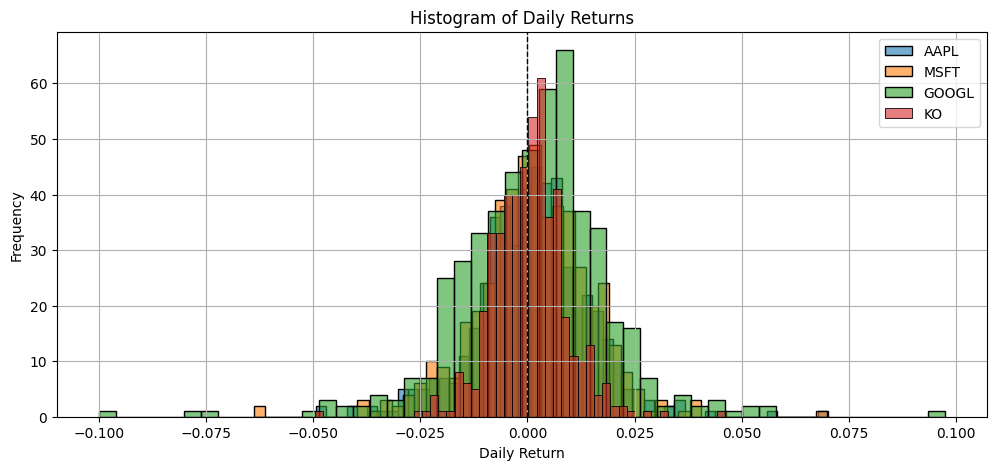

Skewness & Kurtosis:
AAPL - Skewness: 0.08, Kurtosis: 2.61
MSFT - Skewness: -0.29, Kurtosis: 2.71
GOOGL - Skewness: -0.37, Kurtosis: 5.06
KO - Skewness: 0.02, Kurtosis: 3.81


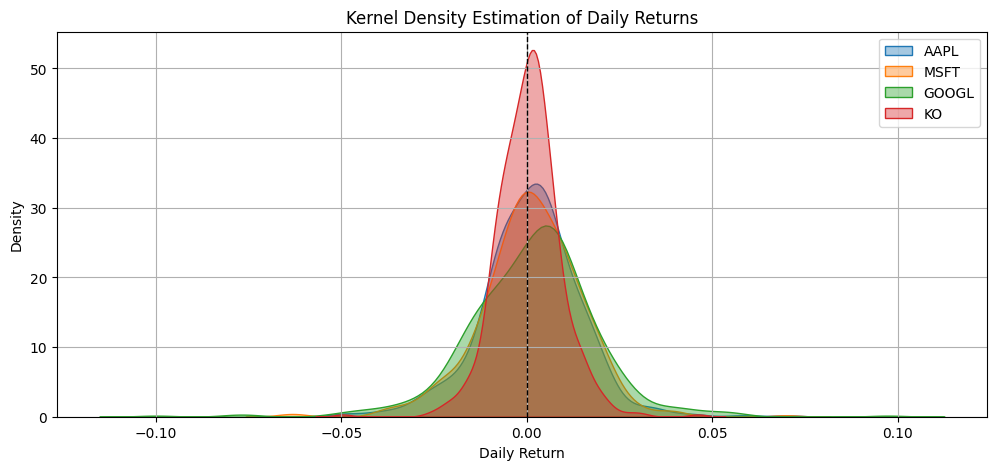

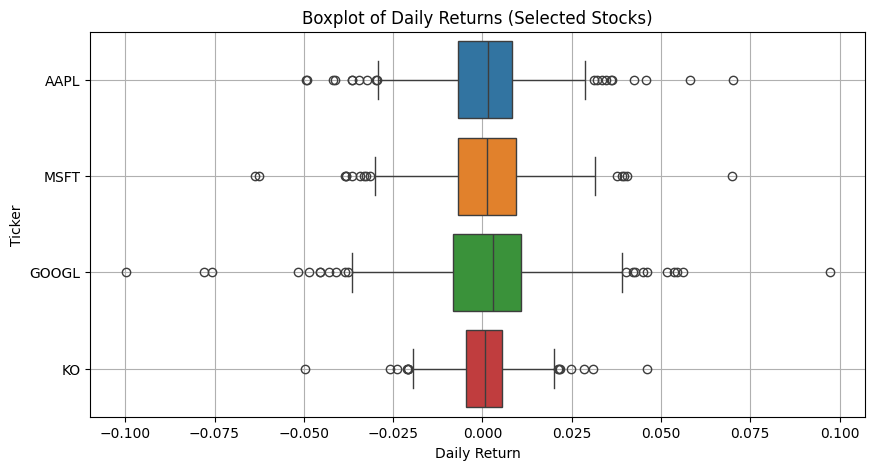

In [47]:
selected_stocks = ["AAPL", "MSFT", "GOOGL", "KO"]


# Histogram of Returns with Skewness & Kurtosis
plt.figure(figsize=(12, 5))
for stock in selected_stocks:
    sns.histplot(log_returns[stock], bins=50, kde=False, alpha=0.6, label=stock)
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.legend()
plt.title("Histogram of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

print("Skewness & Kurtosis:")
for stock in selected_stocks:
    print(f"{stock} - Skewness: {skew(log_returns[stock]):.2f}, Kurtosis: {kurtosis(log_returns[stock]):.2f}")

# Kernel Density Estimation (KDE) - Smoothed Probability Distribution
plt.figure(figsize=(12, 5))
for stock in selected_stocks:
    sns.kdeplot(log_returns[stock], label=stock, fill=True, alpha=0.4)
plt.axvline(0, color='black', linestyle='dashed', linewidth=1)
plt.legend()
plt.title("Kernel Density Estimation of Daily Returns")
plt.xlabel("Daily Return")
plt.ylabel("Density")
plt.grid(True)
plt.show()

# Boxplots of Returns - Compare Across Stocks
# It looked complicated since it consists of all stocks. --> Did it for a subset of stocks below.
'''plt.figure(figsize=(12, 5))
sns.boxplot(data=daily_returns, orient="h")
plt.title("Boxplot of Daily Returns Across Stocks")
plt.xlabel("Daily Return")
plt.grid(True)
plt.show()
'''

plt.figure(figsize=(10, 5))
sns.boxplot(data=log_returns[selected_stocks], orient="h")
plt.title("Boxplot of Daily Returns (Selected Stocks)")
plt.xlabel("Daily Return")
plt.grid(True)
plt.show()


### **Risk & Correlations**

- **Correlation Matrix:** Table that shows the correlation coefficients between different stocks. The values range from -1 to 1, where 1 indicates a perfect positive correlation, -1 indicates a perfect negative correlation, and 0 means no correlation. It helps identify relationships between assets, guiding portfolio diversification and risk management.


- **Correlation Heatmap:** A color-coded matrix showing how strongly different stocks move together, helping identify diversification opportunities or high-risk dependencies.

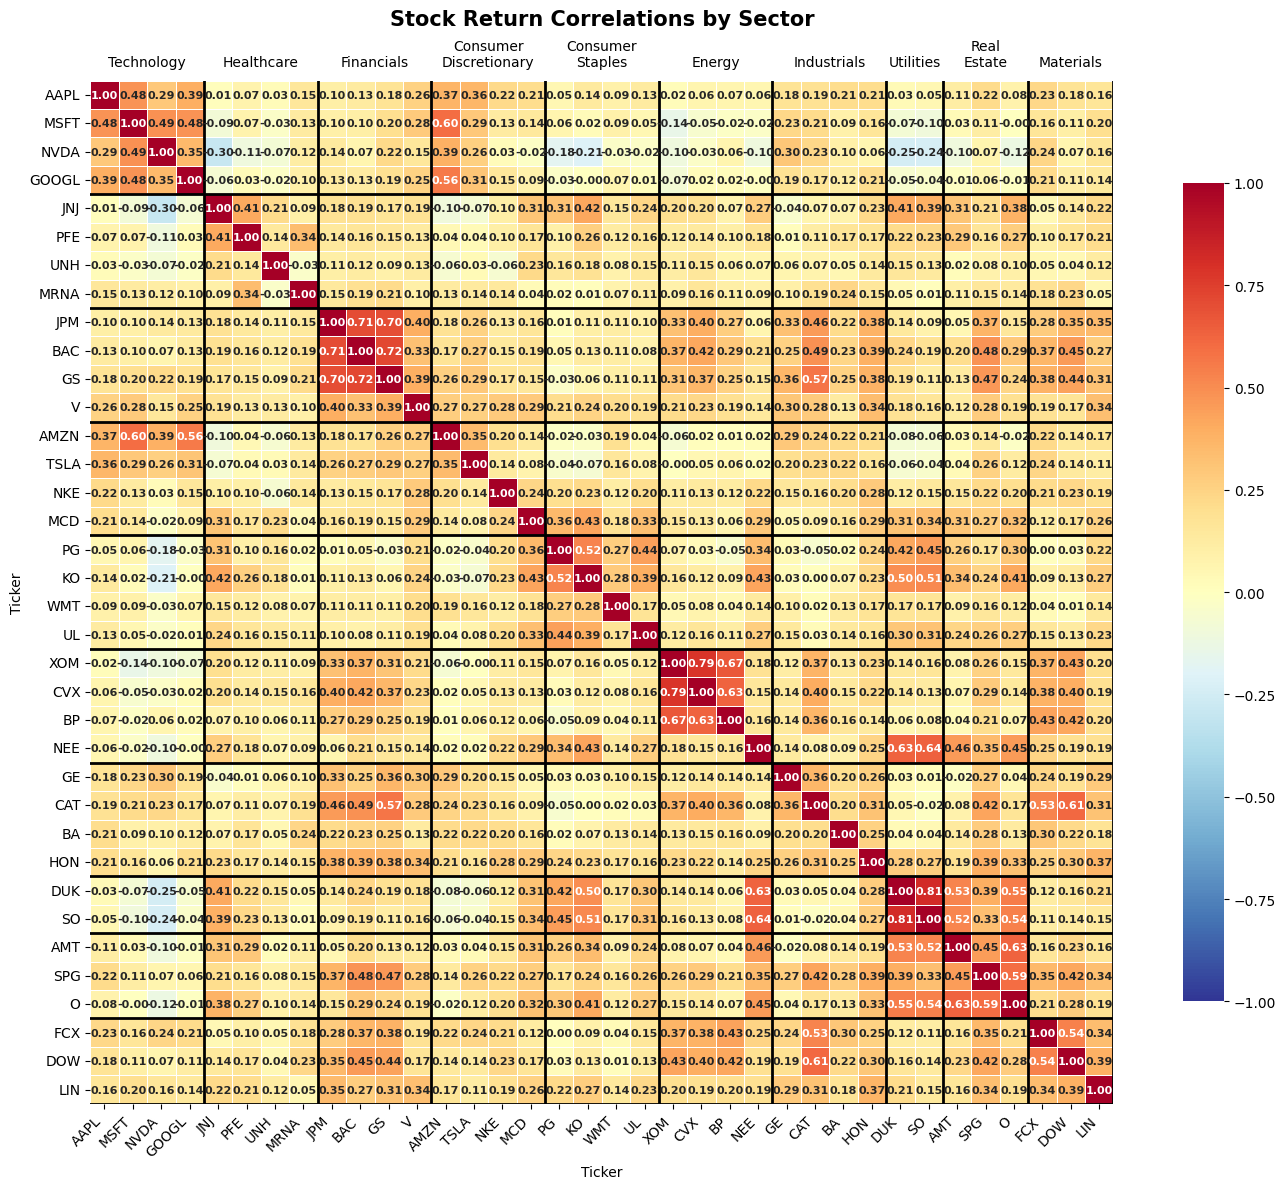


Cross-sector Average Correlations:

Real Estate - Utilities: 0.4762553779751757
Consumer Staples - Utilities: 0.3523213351603611
Financials - Industrials: 0.33520737008878415
Financials - Materials: 0.32408395485160496
Industrials - Materials: 0.31634706065674023
Energy - Materials: 0.303215249502699
Energy - Financials: 0.26258347020616
Materials - Real Estate: 0.2589372981160274
Consumer Discretionary - Technology: 0.2563144382280192
Financials - Real Estate: 0.24854998074097664
Energy - Utilities: 0.24800670640361944
Consumer Staples - Real Estate: 0.23883125005301642
Consumer Discretionary - Financials: 0.21749250293456832
Energy - Real Estate: 0.21250078469542014
Industrials - Real Estate: 0.20128432222034245
Healthcare - Utilities: 0.19733899197783591
Consumer Discretionary - Industrials: 0.19709946728352296
Energy - Industrials: 0.194920460522989
Consumer Discretionary - Materials: 0.18420622307392073
Healthcare - Real Estate: 0.18395703247311815
Industrials - Technology: 0.177

In [48]:
def format_sector_name(sector):

    words = sector.split()
    if len(words) > 1:
        mid = len(words) // 2
        return '\n'.join([' '.join(words[:mid]), ' '.join(words[mid:])])
    return sector

def create_sector_correlation_matrix(returns_data, stocks_dict, figsize=(15, 12)):

    corr_matrix = returns_data.corr()
    
    # Create ordered list of tickers by sector
    ordered_tickers = []
    sector_labels = []  # For sector boundaries
    current_position = 0
    
    for sector, tickers in stocks_dict.items():
        ordered_tickers.extend(tickers)
        current_position += len(tickers)
        sector_labels.append((sector, current_position))
    
    # Reorder correlation matrix
    ordered_corr = corr_matrix.loc[ordered_tickers, ordered_tickers]
    
    plt.figure(figsize=figsize)
    
    # Create heatmap
    sns.heatmap(ordered_corr, 
                cmap='RdYlBu_r',
                vmin=-1, vmax=1,
                center=0,
                annot=True,  # Show correlation values
                fmt='.2f',   # Format for correlation values
                annot_kws={'size': 8, 'weight':'bold'},
                square=True,
                linewidths=0.5,
                cbar_kws={"shrink": .8})
    
    # Add sector boundaries
    prev_position = 0
    for sector, position in sector_labels:
        # Add horizontal lines
        plt.axhline(y=position, color='black', linewidth=2)
        # Add vertical lines
        plt.axvline(x=position, color='black', linewidth=2)
        
        # Add sector labels
        if position - prev_position > 1:  # Only add label if sector has more than one stock
            mid_point = (prev_position + position) / 2
            # Add sector only on x-axis
            formatted_sector = format_sector_name(sector)
            plt.text(mid_point, -0.5, formatted_sector, 
                    horizontalalignment='center')
        prev_position = position
    
    plt.title('Stock Return Correlations by Sector', pad=40, fontsize=15, weight='bold')
    
    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45, ha='right')
    plt.yticks(rotation=0)
    
    plt.tight_layout()
    plt.show()


def print_cross_sector_correlations(returns_data, stocks_dict):

    sector_pairs = []
    for sector1 in stocks_dict:
        for sector2 in stocks_dict:
            if sector1 < sector2:  # To avoid duplicates
                tickers1 = stocks_dict[sector1]
                tickers2 = stocks_dict[sector2]
                
                # Calculate average correlation between sectors
                corr_sum = 0
                count = 0
                for t1 in tickers1:
                    for t2 in tickers2:
                        corr_sum += returns_data[t1].corr(returns_data[t2])
                        count += 1
                
                if count > 0:
                    avg_corr = corr_sum / count
                    sector_pairs.append((sector1, sector2, avg_corr))
    
    # Sort by absolute correlation value
    sector_pairs.sort(key=lambda x: abs(x[2]), reverse=True)
    
    print("\nCross-sector Average Correlations:\n")
    for sector1, sector2, corr in sector_pairs:
        print(f"{sector1} - {sector2}: {corr}")


create_sector_correlation_matrix(log_returns, stocks)
print_cross_sector_correlations(log_returns, stocks)


## **AutoCorrealations**

Autocorrelation measures how much a variable is correlated with its own past values. In stock returns, it tells us if today's return has any relationship with previous days' returns.

**What is lag?**

Lag refers to the number of time gaps autocorrelation applied. 

- Lag 1: Comparing today with yesterday
- Lag 2: Comparing today with two days ago
- Lag 3: Comparing today with three days ago
... and so on

Autocorrelation ranges from -1 to +1

(For the case where considering returns - Second Plot)
- Positive autocorrelation: Returns tend to continue in the same direction
- Negative autocorrelation: Returns tend to reverse direction
- Zero autocorrelation: No relationship between past and present returns

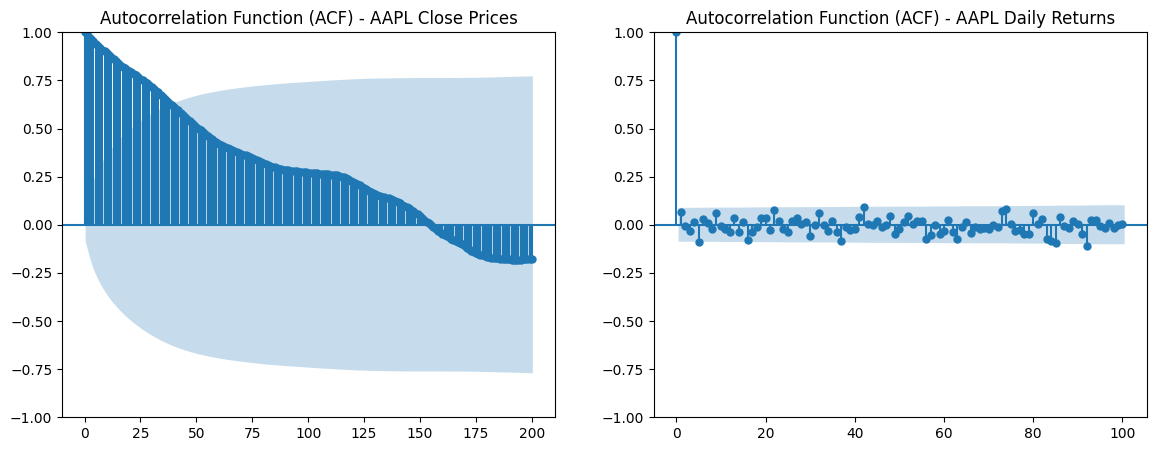

In [49]:
close_apple = close["AAPL"]
returns_apple = log_returns["AAPL"]

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# ACF (Autocorrelation Function)
plot_acf(close_apple, lags=200, ax=axes[0])
axes[0].set_title('Autocorrelation Function (ACF) - AAPL Close Prices')

plot_acf(returns_apple, lags=100, ax=axes[1]) # lower # of lags for observation
axes[1].set_title('Autocorrelation Function (ACF) - AAPL Daily Returns')


plt.show()